<a href="https://colab.research.google.com/github/Abinayavelayutham/Abinaya-V/blob/main/Stock_price_prediction_Abinaya_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
start = '2018-02-05'
end = '2022-02-04'

path = r'/content/drive/MyDrive/Stock_Dataset.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900


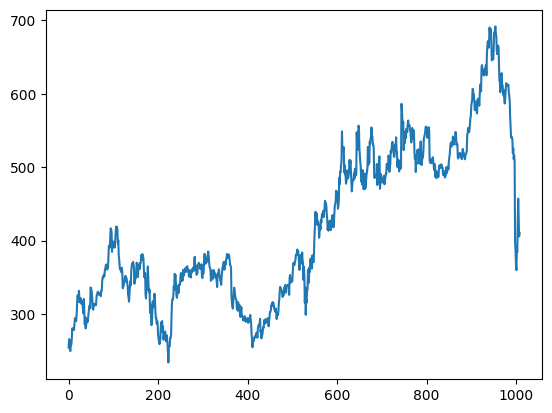

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,9905200


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1004,600.807798
1005,599.403698
1006,597.711299
1007,595.874399


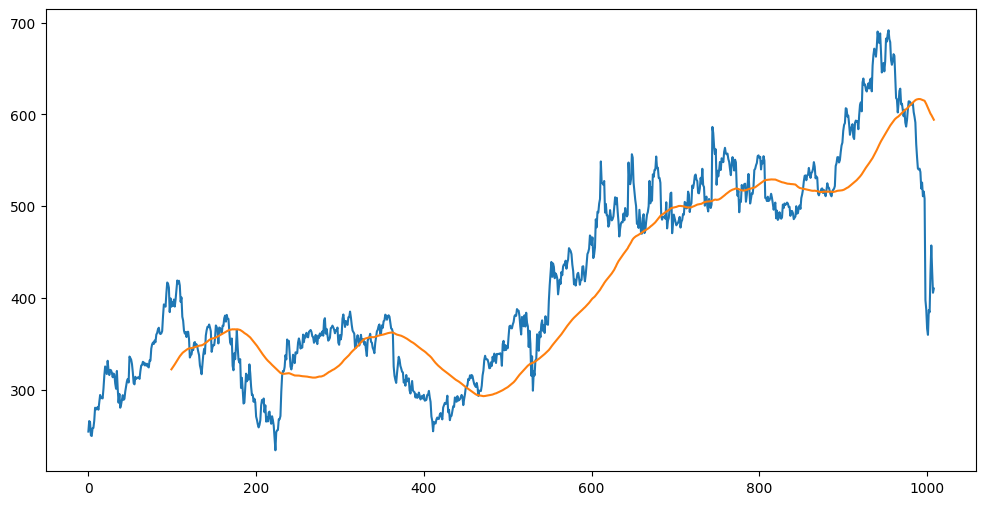

In [9]:
plt.figure(figsize =(12, 6))
plt.plot(df.Close)
plt.plot(ma100)

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1004,560.237698
1005,559.751148
1006,559.150698
1007,558.634198


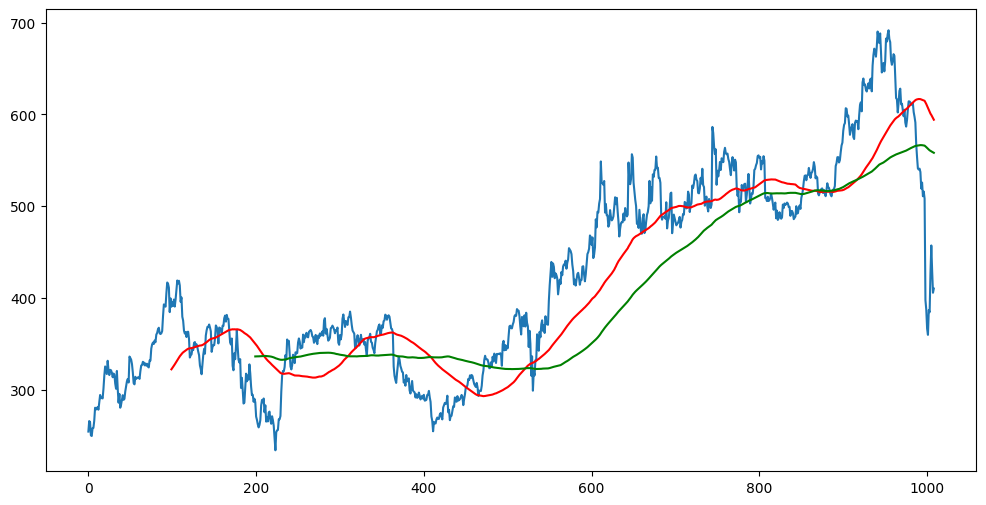

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(1009, 5)

In [13]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [14]:
data_training.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [15]:
data_testing.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [17]:
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [18]:
data_training_array.shape

(706, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(606, 100, 1)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',  return_sequences = True,
                 input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu',  return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu',  return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))





model.add(Dense(units = 1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose = 2)

Epoch 1/50
19/19 - 12s - 644ms/step - loss: 0.0911
Epoch 2/50
19/19 - 8s - 398ms/step - loss: 0.0215
Epoch 3/50
19/19 - 5s - 252ms/step - loss: 0.0196
Epoch 4/50
19/19 - 5s - 276ms/step - loss: 0.0152
Epoch 5/50
19/19 - 7s - 389ms/step - loss: 0.0158
Epoch 6/50
19/19 - 8s - 412ms/step - loss: 0.0137
Epoch 7/50
19/19 - 8s - 401ms/step - loss: 0.0150
Epoch 8/50
19/19 - 8s - 406ms/step - loss: 0.0137
Epoch 9/50
19/19 - 8s - 400ms/step - loss: 0.0149
Epoch 10/50
19/19 - 9s - 474ms/step - loss: 0.0145
Epoch 11/50
19/19 - 9s - 471ms/step - loss: 0.0128
Epoch 12/50
19/19 - 6s - 326ms/step - loss: 0.0120
Epoch 13/50
19/19 - 9s - 465ms/step - loss: 0.0118
Epoch 14/50
19/19 - 8s - 395ms/step - loss: 0.0113
Epoch 15/50
19/19 - 8s - 410ms/step - loss: 0.0117
Epoch 16/50
19/19 - 7s - 393ms/step - loss: 0.0117
Epoch 17/50
19/19 - 8s - 414ms/step - loss: 0.0121
Epoch 18/50
19/19 - 7s - 388ms/step - loss: 0.0103
Epoch 19/50
19/19 - 8s - 416ms/step - loss: 0.0107
Epoch 20/50
19/19 - 7s - 360ms/step - l

In [27]:
data_testing.head()

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012


In [28]:
data_training.tail()

,Close
701,479.100006
702,480.630005
703,481.790009
704,484.670013
705,488.239990


In [29]:
#Append testing and training data
past_100_days = data_training.tail(100)

In [32]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [33]:
#Scaling the data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [34]:
input_data.shape

(403, 1)

In [36]:
#Preparing the testing data
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [37]:
#Making predictions

y_predicted = model.predict(x_test)
print(y_predicted.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step
(303, 1)


In [38]:
#Checking y_test

y_test

array([0.35217924, 0.37103526, 0.37742098, 0.39657814, 0.39459021,
       0.43639862, 0.43278411, 0.41513293, 0.41751255, 0.47013471,
       0.46073667, 0.4033254 , 0.42588629, 0.43230216, 0.49013517,
       0.48218326, 0.49739453, 0.52170251, 0.52637129, 0.50968392,
       0.50492488, 0.46621878, 0.46468256, 0.48019515, 0.51558778,
       0.49667165, 0.54528743, 0.49146052, 0.48525552, 0.42407899,
       0.44938103, 0.45392929, 0.41989216, 0.40528327, 0.44606766,
       0.42519346, 0.41651858, 0.42793452, 0.68267123, 0.66309233,
       0.61890412, 0.59363241, 0.60914481, 0.49272575, 0.53887156,
       0.52016629, 0.54019691, 0.5676676 , 0.54143199, 0.57971616,
       0.57558954, 0.56694472, 0.60053014, 0.61414507, 0.59607223,
       0.59284922, 0.59513848, 0.57724637, 0.56784832, 0.54375121,
       0.52435321, 0.56161335, 0.58348133, 0.56326999, 0.5396246 ,
       0.57513783, 0.56664358, 0.48495438, 0.45661014, 0.47197207,
       0.40251206, 0.44200125, 0.43627821, 0.49206299, 0.47688

In [39]:
#Checking y_predicted
y_predicted

array([[0.38075274],
       [0.3783952 ],
       [0.3766119 ],
       [0.37555903],
       [0.37566364],
       [0.37711108],
       [0.38057357],
       [0.38624075],
       [0.3934446 ],
       [0.40129107],
       [0.40991196],
       [0.41914698],
       [0.4274994 ],
       [0.43411702],
       [0.4387552 ],
       [0.4425933 ],
       [0.44651464],
       [0.4512319 ],
       [0.45742887],
       [0.46530733],
       [0.47421026],
       [0.4831701 ],
       [0.4905903 ],
       [0.49541995],
       [0.4976449 ],
       [0.49841014],
       [0.49842802],
       [0.49911487],
       [0.50029695],
       [0.5013952 ],
       [0.50077564],
       [0.49797124],
       [0.4932806 ],
       [0.4867185 ],
       [0.47832793],
       [0.46921313],
       [0.46010268],
       [0.45138708],
       [0.4435448 ],
       [0.4417612 ],
       [0.44938484],
       [0.46606222],
       [0.4887598 ],
       [0.51411283],
       [0.5366585 ],
       [0.5537893 ],
       [0.56443954],
       [0.569

In [41]:
#Scaling the data
scaler.scale_

array([0.00301214])

In [42]:
scale_factor = 1/0.00301214
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

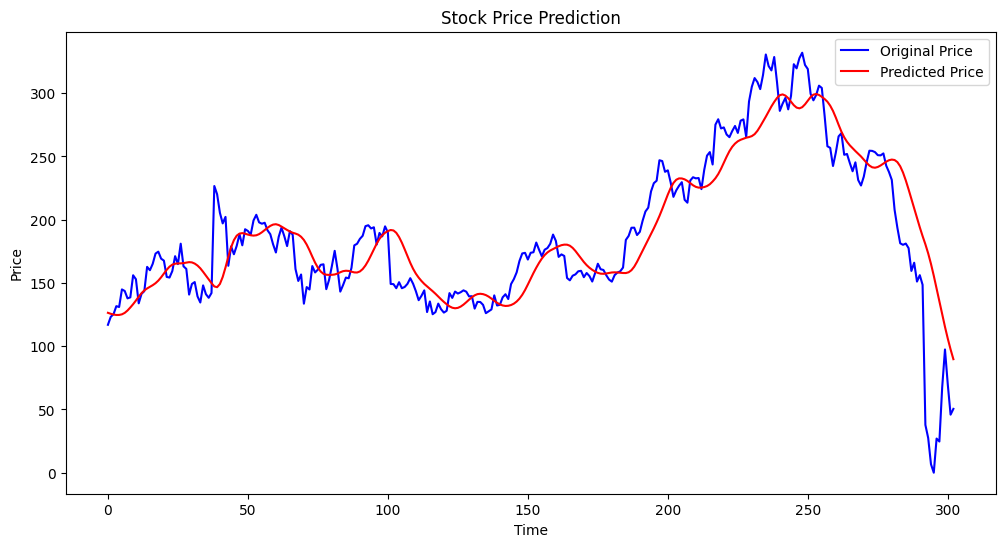

In [43]:
#Plotting graph for the result
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()